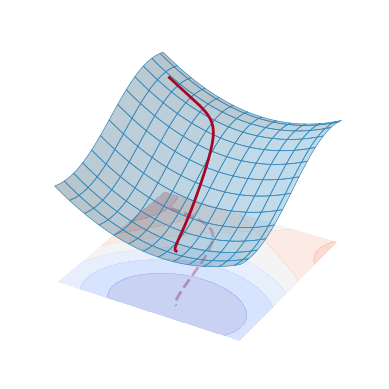

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import copy


# make loss function
xi, yi = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xi, yi)

f = lambda x, y: (x - 0.2) ** 2 + np.sin(2 * y)
f_grad = lambda x, y: [2 * (x - 0.2), 2 * np.cos(2 * y)]

Z = f(X, Y)

# make GD optimizer

class Track:
    def __init__(self):
        self.x = []
        self.y = []
        self.z = []
    
    def add(self, x, y, z):
        self.x.append(copy.deepcopy(x))
        self.y.append(copy.deepcopy(y))
        self.z.append(copy.deepcopy(z))


class Optimizer:
    def __init__(self, x0, y0, f, f_grad, eta=0.01):
        self.track = Track()
        self.x, self.y = x0, y0
        self.f = f
        self.f_grad = f_grad
        self.eta = eta

    def optimize(self, max_steps):
        for i in range(max_steps):
            self.x = self.x - self.eta * self.f_grad(self.x, self.y)[0]
            self.y = self.y - self.eta * self.f_grad(self.x, self.y)[1]
            self.track.add(self.x, self.y, self.f(self.x, self.y))
        
optimizer = Optimizer(-0.8, 0.75, f, f_grad)
optimizer.optimize(300)
track = optimizer.track


# visualize result
plt.style.use('bmh')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax._axis3don = False
ax.set_facecolor((1, 1, 1, 0)) # set background to be white


ax.plot(track.x, track.y, track.z, color='C1', zorder=100)
ax.plot_surface(X, Y, Z, edgecolor='C0', lw=0.5, rstride=8, cstride=8,
            alpha=0.3)

ax.contourf(X, Y, Z, zdir='z', offset=-3, cmap='coolwarm', alpha=0.3)
ax.plot(track.x, track.y, np.zeros_like(track.x) - 3, zdir='z', color='C1', alpha=0.4, ls='--')

fig.savefig('gradient_descent_demo.png', dpi=300)
